In [48]:
import prepare_data
import pandas as pd
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import matplotlib.pyplot as plt
import pyphen
dic = pyphen.Pyphen(lang='en')

# Load Data

In [43]:
def concat_string(strings):
    return "_".join(strings)

In [217]:
british_council_path = "data/british_council/cleaned_articles.csv"
tok_pos_path = "data/british_council/tok_pos_articles.csv"
tok_pos_lem_path = "data/british_council/tok_pos_lem_articles.csv"
feature_set_path ="data/british_council/tok_pos_lem_features_articles.csv"

In [186]:
level1_col = "level1"
level2_col = "level2"
level3_col = "level3"
all_level_col = [level1_col,level2_col,level3_col]

level1_pos_col = "level1_pos"
level2_pos_col = "level2_pos"
level3_pos_col = "level3_pos"
all_level_pos_col = [level1_pos_col,level2_pos_col,level3_pos_col]

level1_tok_col = "level1_tok"
level2_tok_col = "level2_tok"
level3_tok_col = "level3_tok"
all_level_tok_col = [level1_tok_col,level2_tok_col,level3_tok_col]

level1_lem_col = "level1_lem"
level2_lem_col = "level2_lem"
level3_lem_col = "level3_lem"
all_level_lem_col = [level1_lem_col,level2_lem_col,level3_lem_col]

mean_sent_len_col = "mean_sent_len"
mean_word_len_col = "mean_word_len"
basic_eng_ratio_col = "basic_eng_ratio"
syllabus_col = "mean_syllabus_len"
ttr_col = "ttr"
all_basic_eng_ratio_col = [concat_string([level_col,basic_eng_ratio_col]) for level_col in all_level_col]
all_syllabus_col = [concat_string([level_col,syllabus_col]) for level_col in all_level_col]
all_ttr_col = [concat_string([level_col,ttr_col]) for level_col in all_level_col]

filter_tags = tuple(["N","VB","J","RB","PRP"])
filter_tag_col = "mean_{}_count"
all_filter_tag_col = [[concat_string([level_col,filter_tag_col.format(tag)]) for level_col in all_level_col] for tag in filter_tags ]

In [59]:
df = prepare_data.load_df(british_council_path,["cleaned1","cleaned2","cleaned3"])
df.rename(
    index=str,
    columns={
        "cleaned1":level1_col,
        "cleaned2":level2_col,
        "cleaned3":level3_col},
    inplace=True)
df.head()

,article_name,level1,level2,level3
0,walk-forest-level,[Going through the forest is my favourite part...,[Going through the forest is my favourite part...,[Going through the forest is my favourite part...
1,amazing-adventurers-level,[Do you ever dream about climbing Mount Everes...,[Have you ever dreamt of climbing Mount Everes...,[Have you ever dreamt of climbing Mount Everes...
2,animals-city-level,"[One night in December 2011, a bear came into ...","[Recently, there have been many reports in new...","[Small animals like birds, squirrels, mice and..."
3,bully-level,[Kay got another message as she was leaving fo...,[Kay got another message as she was leaving fo...,[Kay got another message as she was leaving fo...
4,cheat-level,[Mo was waiting outside her class. She was fee...,[Mo was waiting in the corridor outside her cl...,[Mo was waiting in the corridor with her class...


In [61]:
#concatenate articles to have one 3 texts per article
concat_df = df.copy()
concat_df[all_level_col] = concat_df[all_level_col].applymap(lambda x: " ".join(x))

# Tokenize and POS Tagging

In [32]:
def tok_pos_tagging(text):
    
    tok_text = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(text)]
    tok_pos_text = list(zip(*[list(zip(*nltk.pos_tag(sent))) for sent in tok_text]))
    
    return tok_pos_text

In [35]:
def serie_tok_pos_tagging(series):
    return [tok_pos_tagging(text) for text in series]

In [64]:
tok_pos_df = pd.concat([pd.DataFrame(
        data=serie_tok_pos_tagging(concat_df[level]),
        columns=[level+"_tok",level+"_pos"]) 
 for level in all_level_col],axis=1)


In [68]:
tok_pos_df["article_name"] = df["article_name"].values
tok_pos_df.head()

,level1_tok,level1_pos,level2_tok,level2_pos,level3_tok,level3_pos,article_name
0,"((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...","((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...","((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...",walk-forest-level
1,"((Do, you, ever, dream, about, climbing, Mount...","((VB, PRP, RB, VBP, IN, VBG, NNP, NNP, CC, VBG...","((Have, you, ever, dreamt, of, climbing, Mount...","((VBP, PRP, RB, VB, IN, VBG, NNP, NNP, CC, VBG...","((Have, you, ever, dreamt, of, climbing, Mount...","((VBP, PRP, RB, VB, IN, VBG, NNP, NNP, CC, VBG...",amazing-adventurers-level
2,"((One, night, in, December, 2011, ,, a, bear, ...","((CD, NN, IN, NNP, CD, ,, DT, NN, VBD, IN, DT,...","((Recently, ,, there, have, been, many, report...","((RB, ,, EX, VBP, VBN, JJ, NNS, IN, NNS, CC, I...","((Small, animals, like, birds, ,, squirrels, ,...","((JJ, NNS, IN, NNS, ,, NNS, ,, NN, CC, NNS, VB...",animals-city-level
3,"((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...","((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...","((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...",bully-level
4,"((Mo, was, waiting, outside, her, class, .), (...","((NNP, VBD, VBG, IN, PRP$, NN, .), (PRP, VBD, ...","((Mo, was, waiting, in, the, corridor, outside...","((NNP, VBD, VBG, IN, DT, NN, IN, PRP$, NN, .),...","((Mo, was, waiting, in, the, corridor, with, h...","((NNP, VBD, VBG, IN, DT, NN, IN, PRP$, NN, IN,...",cheat-level


In [69]:
tok_pos_path = "data/british_council/tok_pos_articles.csv"
prepare_data.save_df(tok_pos_path,tok_pos_df)

## Lemmatizing

In [3]:
 def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
lemmatizer = WordNetLemmatizer()

In [24]:
tok_pos_df = prepare_data.load_df(tok_pos_path,all_level_pos_col+all_level_tok_col)
df = tok_pos_df.copy()

In [25]:
lemmatized_text_list = []
for pos_col,tok_col,lem_col in zip(*[all_level_pos_col,all_level_tok_col,all_level_lem_col]):
    lemmatized_text = df.apply(
        lambda x: [[lemmatizer.lemmatize(word,get_wordnet_pos(tag)) for word,tag in zip(*[sent,tags])]
                   for sent,tags in zip(*[x[tok_col],x[pos_col]])],axis=1)
    df[lem_col] = lemmatized_text
    #lemmatized_text_list += [lemmatized_text]

In [27]:
prepare_data.save_df(tok_pos_lem_path,df)

# Feature Creation

In [30]:
df = prepare_data.load_df(tok_pos_lem_path,all_level_pos_col+all_level_tok_col+all_level_lem_col)

In [96]:
def plot_level(df,y_cols,title):
    x = list(range(1,len(y_cols)+1))
    y = [df[y_col] for y_col in y_cols]
    plt.title(title)
    plt.plot(x,y)
    plt.show()
    

## Word and Sentence Ratio

In [28]:
def count_sent_word_length(text):
    n_sent = len(text)
    sent_len = [len(words) for words in text]
    n_words = sum(sent_len)
    word_len = [len(word) for words in text for word in words]
    
    mean_word_len = np.mean(word_len)
    mean_sent_len = np.mean(sent_len)
    return mean_word_len,mean_sent_len

In [46]:
for ind,tok_col in enumerate(all_level_tok_col):
    level_col = all_level_col[ind]
    sent_word_count = np.concatenate(df[[tok_col]].applymap(lambda x: count_sent_word_length(x)).values)
    mean_word_len,mean_sent_len = list(zip(*sent_word_count))
    df[concat_string([level_col,mean_word_len_col])] = mean_word_len
    df[concat_string([level_col,mean_sent_len_col])] = mean_sent_len

In [47]:
df.head()

,level1_tok,level1_pos,level2_tok,level2_pos,level3_tok,level3_pos,article_name,level1_lem,level2_lem,level3_lem,level1_mean_word_len,level1_mean_sent_len,level2_mean_word_len,level2_mean_sent_len,level3_mean_word_len,level3_mean_sent_len
0,"((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...","((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...","((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...",walk-forest-level,"[[Going, through, the, forest, be, my, favouri...","[[Going, through, the, forest, be, my, favouri...","[[Going, through, the, forest, be, my, favouri...",2.854563,8.766667,2.895207,9.255639,2.947776,10.271523
1,"((Do, you, ever, dream, about, climbing, Mount...","((VB, PRP, RB, VBP, IN, VBG, NNP, NNP, CC, VBG...","((Have, you, ever, dreamt, of, climbing, Mount...","((VBP, PRP, RB, VB, IN, VBG, NNP, NNP, CC, VBG...","((Have, you, ever, dreamt, of, climbing, Mount...","((VBP, PRP, RB, VB, IN, VBG, NNP, NNP, CC, VBG...",amazing-adventurers-level,"[[Do, you, ever, dream, about, climb, Mount, E...","[[Have, you, ever, dream, of, climb, Mount, Ev...","[[Have, you, ever, dream, of, climb, Mount, Ev...",4.081466,16.366667,4.118263,17.578947,4.263302,20.361111
2,"((One, night, in, December, 2011, ,, a, bear, ...","((CD, NN, IN, NNP, CD, ,, DT, NN, VBD, IN, DT,...","((Recently, ,, there, have, been, many, report...","((RB, ,, EX, VBP, VBN, JJ, NNS, IN, NNS, CC, I...","((Small, animals, like, birds, ,, squirrels, ,...","((JJ, NNS, IN, NNS, ,, NNS, ,, NN, CC, NNS, VB...",animals-city-level,"[[One, night, in, December, 2011, ,, a, bear, ...","[[Recently, ,, there, have, be, many, report, ...","[[Small, animal, like, bird, ,, squirrel, ,, m...",3.903766,13.277778,3.909879,16.027778,4.219178,19.466667
3,"((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...","((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...","((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...",bully-level,"[[Kay, get, another, message, a, she, be, leav...","[[Kay, get, another, message, a, she, be, leav...","[[Kay, get, another, message, a, she, be, leav...",3.481735,8.342857,3.497612,9.025862,3.458202,9.753846
4,"((Mo, was, waiting, outside, her, class, .), (...","((NNP, VBD, VBG, IN, PRP$, NN, .), (PRP, VBD, ...","((Mo, was, waiting, in, the, corridor, outside...","((NNP, VBD, VBG, IN, DT, NN, IN, PRP$, NN, .),...","((Mo, was, waiting, in, the, corridor, with, h...","((NNP, VBD, VBG, IN, DT, NN, IN, PRP$, NN, IN,...",cheat-level,"[[Mo, be, wait, outside, her, class, .], [She,...","[[Mo, be, wait, in, the, corridor, outside, he...","[[Mo, be, wait, in, the, corridor, with, her, ...",3.355080,12.986111,3.384543,13.430380,3.412097,15.121951


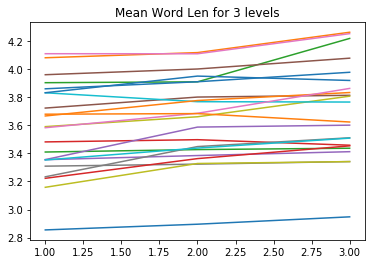

In [55]:
x = [1,2,3]
y = [df[concat_string([level_col,mean_word_len_col])] for level_col in all_level_col]
plt.title("Mean Word Len for 3 levels")
plt.plot(x,y)
plt.show()

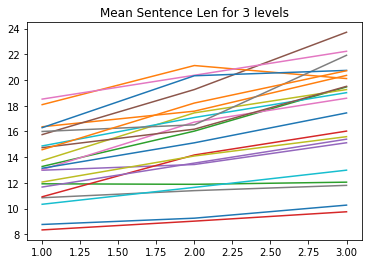

In [56]:
x = [1,2,3]
y = [df[concat_string([level_col,mean_sent_len_col])] for level_col in all_level_col]
plt.title("Mean Sentence Len for 3 levels")
plt.plot(x,y)
plt.show()

## Ratio of Basic English in the text

### Basic English

In [57]:
with open("data/basic_english.txt","r") as f:
    data = f.read()
    words = data.split(" , ")
    basic_df = pd.DataFrame(data=words,columns=["word"])
    basic_df["index"] = range(0,len(basic_df))
basic_df.head()

,word,index
0,a,0
1,able,1
2,about,2
3,account,3
4,acid,4


### Top 20K English Words

In [59]:
with open("data/20k_words.txt","r") as f:
    data = f.read()
    words = data.split("\n")
    english_df = pd.DataFrame(data=words,columns=["word"])
    english_df["index"] = range(0,len(english_df))
english_df.head()

,word,index
0,the,0
1,of,1
2,and,2
3,to,3
4,a,4


### Difficult English (Basic English removed from 20K corpus)

In [60]:
non_basic_df = english_df.loc[~english_df["word"].isin(basic_df["word"])]
non_basic_df.head(10)

,word,index
7,is,7
10,by,10
13,i,13
15,it,15
18,be,18
19,are,19
23,your,23
27,more,27
28,an,28
29,was,29


### Basic English Ratio

In [77]:
def basic_eng_ratio(text):
    text_set = set(np.concatenate(text))
    return len(text_set.intersection(
        basic_df["word"].values))/len(text_set)

In [86]:
basic_eng_ratio_df = df[all_level_lem_col].applymap(
    lambda x: basic_eng_ratio(x))

for lem_col,ratio_col in zip(*[all_level_lem_col,all_basic_eng_ratio_col]):
    df[ratio_col] = basic_eng_ratio_df[lem_col]

In [87]:
df.head()

,level1_tok,level1_pos,level2_tok,level2_pos,level3_tok,level3_pos,article_name,level1_lem,level2_lem,level3_lem,level1_mean_word_len,level1_mean_sent_len,level2_mean_word_len,level2_mean_sent_len,level3_mean_word_len,level3_mean_sent_len,level1_basic_eng_ratio,level2_basic_eng_ratio,level3_basic_eng_ratio
0,"((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...","((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...","((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...",walk-forest-level,"[[Going, through, the, forest, be, my, favouri...","[[Going, through, the, forest, be, my, favouri...","[[Going, through, the, forest, be, my, favouri...",2.854563,8.766667,2.895207,9.255639,2.947776,10.271523,0.347985,0.352381,0.359897
1,"((Do, you, ever, dream, about, climbing, Mount...","((VB, PRP, RB, VBP, IN, VBG, NNP, NNP, CC, VBG...","((Have, you, ever, dreamt, of, climbing, Mount...","((VBP, PRP, RB, VB, IN, VBG, NNP, NNP, CC, VBG...","((Have, you, ever, dreamt, of, climbing, Mount...","((VBP, PRP, RB, VB, IN, VBG, NNP, NNP, CC, VBG...",amazing-adventurers-level,"[[Do, you, ever, dream, about, climb, Mount, E...","[[Have, you, ever, dream, of, climb, Mount, Ev...","[[Have, you, ever, dream, of, climb, Mount, Ev...",4.081466,16.366667,4.118263,17.578947,4.263302,20.361111,0.351351,0.299652,0.299685
2,"((One, night, in, December, 2011, ,, a, bear, ...","((CD, NN, IN, NNP, CD, ,, DT, NN, VBD, IN, DT,...","((Recently, ,, there, have, been, many, report...","((RB, ,, EX, VBP, VBN, JJ, NNS, IN, NNS, CC, I...","((Small, animals, like, birds, ,, squirrels, ,...","((JJ, NNS, IN, NNS, ,, NNS, ,, NN, CC, NNS, VB...",animals-city-level,"[[One, night, in, December, 2011, ,, a, bear, ...","[[Recently, ,, there, have, be, many, report, ...","[[Small, animal, like, bird, ,, squirrel, ,, m...",3.903766,13.277778,3.909879,16.027778,4.219178,19.466667,0.418994,0.370732,0.316923
3,"((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...","((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...","((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...",bully-level,"[[Kay, get, another, message, a, she, be, leav...","[[Kay, get, another, message, a, she, be, leav...","[[Kay, get, another, message, a, she, be, leav...",3.481735,8.342857,3.497612,9.025862,3.458202,9.753846,0.322222,0.299035,0.311765
4,"((Mo, was, waiting, outside, her, class, .), (...","((NNP, VBD, VBG, IN, PRP$, NN, .), (PRP, VBD, ...","((Mo, was, waiting, in, the, corridor, outside...","((NNP, VBD, VBG, IN, DT, NN, IN, PRP$, NN, .),...","((Mo, was, waiting, in, the, corridor, with, h...","((NNP, VBD, VBG, IN, DT, NN, IN, PRP$, NN, IN,...",cheat-level,"[[Mo, be, wait, outside, her, class, .], [She,...","[[Mo, be, wait, in, the, corridor, outside, he...","[[Mo, be, wait, in, the, corridor, with, her, ...",3.355080,12.986111,3.384543,13.430380,3.412097,15.121951,0.349398,0.356115,0.356287


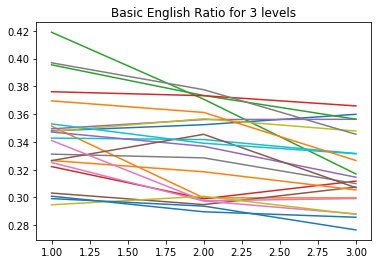

In [88]:
x = [1,2,3]
y = [df[col] for col in all_basic_eng_ratio_col]
plt.title("Basic English Ratio for 3 levels")
plt.plot(x,y)
plt.show()

## Syllabus

In [94]:
syllabus_df = df[all_level_tok_col].applymap(lambda x: len(np.concatenate([dic.inserted(word).split("-") for sent in x for word in sent]))/len(x))

for tok_col,syllabus_col in zip(*[all_level_tok_col,all_syllabus_col]):
    df[syllabus_col] = syllabus_df[tok_col]

In [97]:
df[all_syllabus_col].head()

,level1_mean_syllabus_len,level2_mean_syllabus_len,level3_mean_syllabus_len
0,9.716667,10.285714,11.450331
1,21.133333,23.315789,27.722222
2,16.833333,19.805556,25.755556
3,9.828571,10.612069,11.338462
4,15.416667,16.025316,18.012195


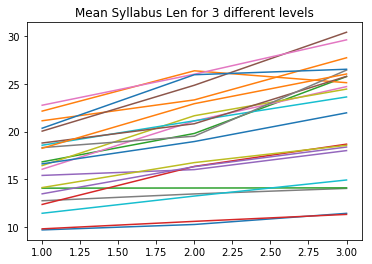

In [98]:
plot_level(df,all_syllabus_col,"Mean Syllabus Count for 3 different levels")

## Type Token Ratio

In [102]:
def TTR(text): 
    words = {} 
    num_words = 0 
    for line in text: 
        for word in line: 
            num_words += 1 
            if word in words: 
                words[word] += 1 
            else: 
                words[word] = 1 
    return len(words) / num_words 


In [118]:
def TTR_adv(text):
    words = [word for sent in text for word in sent]
    counter = Counter(words)
    return len(counter.values())/len(words)

In [120]:
ttr_df = df[all_level_tok_col].applymap(lambda x: TTR_adv(x))
for tok_col,ttr_col in zip(*[all_level_tok_col,all_ttr_col]):
    df[ttr_col] = syllabus_df[tok_col]

In [121]:
ttr_df.head()

,level1_tok,level2_tok,level3_tok
0,0.286122,0.282697,0.275306
1,0.482688,0.471557,0.477490
2,0.397490,0.388215,0.409817
3,0.342466,0.339064,0.309148
4,0.300535,0.292177,0.300000


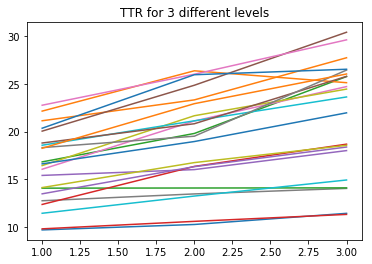

In [122]:
plot_level(df,all_ttr_col,"TTR for 3 different levels")

## POS Token Count

In [187]:
def apply_func_to_levels(df,func,apply_cols,new_cols):
    tmp_df = df[apply_col].applymap(lambda x: func(x))
    for apply_col,new_col in zip(*[apply_cols,new_cols]):
        df[new_col] = tmp_df[apply_col]
    return df

In [212]:
def pos_token_count(text,tag_symb):
    #Token Count for first letter of Tokens
    
    #text = np.concatenate(text)
    #tag_len = len([tag for tag in text if tag.startswith(tag_symb)])
    return np.mean([len([tag for tag in sent if tag.startswith(tag_symb)]) for sent in text])
    

In [213]:
for tag,tag_cols in zip(*[filter_tags,all_filter_tag_col]):
    for tag_col,pos_col in zip(*[tag_cols,all_level_pos_col]):
        pos_df = df[[pos_col]].applymap(lambda x: pos_token_count(x,tag))
        df[tag_col] = pos_df[pos_col]

In [214]:
df

,level1_tok,level1_pos,level2_tok,level2_pos,level3_tok,level3_pos,article_name,level1_lem,level2_lem,level3_lem,...,level3_mean_VB_count,level1_mean_J_count,level2_mean_J_count,level3_mean_J_count,level1_mean_RB_count,level2_mean_RB_count,level3_mean_RB_count,level1_mean_PRP_count,level2_mean_PRP_count,level3_mean_PRP_count
0,"((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...","((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...","((Going, through, the, forest, is, my, favouri...","((VBG, IN, DT, NN, VBZ, PRP$, JJ, NN, IN, DT, ...",walk-forest-level,"[[Going, through, the, forest, be, my, favouri...","[[Going, through, the, forest, be, my, favouri...","[[Going, through, the, forest, be, my, favouri...",...,1.774834,0.366667,0.413534,0.423841,0.341667,0.390977,0.470199,1.225000,1.270677,1.331126
1,"((Do, you, ever, dream, about, climbing, Mount...","((VB, PRP, RB, VBP, IN, VBG, NNP, NNP, CC, VBG...","((Have, you, ever, dreamt, of, climbing, Mount...","((VBP, PRP, RB, VB, IN, VBG, NNP, NNP, CC, VBG...","((Have, you, ever, dreamt, of, climbing, Mount...","((VBP, PRP, RB, VB, IN, VBG, NNP, NNP, CC, VBG...",amazing-adventurers-level,"[[Do, you, ever, dream, about, climb, Mount, E...","[[Have, you, ever, dream, of, climb, Mount, Ev...","[[Have, you, ever, dream, of, climb, Mount, Ev...",...,3.277778,1.100000,0.973684,1.305556,0.633333,0.552632,0.583333,1.033333,0.894737,0.916667
2,"((One, night, in, December, 2011, ,, a, bear, ...","((CD, NN, IN, NNP, CD, ,, DT, NN, VBD, IN, DT,...","((Recently, ,, there, have, been, many, report...","((RB, ,, EX, VBP, VBN, JJ, NNS, IN, NNS, CC, I...","((Small, animals, like, birds, ,, squirrels, ,...","((JJ, NNS, IN, NNS, ,, NNS, ,, NN, CC, NNS, VB...",animals-city-level,"[[One, night, in, December, 2011, ,, a, bear, ...","[[Recently, ,, there, have, be, many, report, ...","[[Small, animal, like, bird, ,, squirrel, ,, m...",...,3.688889,0.555556,0.805556,1.288889,0.388889,0.611111,0.644444,0.750000,0.694444,0.822222
3,"((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...","((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...","((Kay, got, another, message, as, she, was, le...","((NNP, VBD, DT, NN, IN, PRP, VBD, VBG, IN, NN,...",bully-level,"[[Kay, get, another, message, a, she, be, leav...","[[Kay, get, another, message, a, she, be, leav...","[[Kay, get, another, message, a, she, be, leav...",...,2.046154,0.352381,0.336207,0.323077,0.323810,0.379310,0.492308,0.876190,1.008621,1.153846
4,"((Mo, was, waiting, outside, her, class, .), (...","((NNP, VBD, VBG, IN, PRP$, NN, .), (PRP, VBD, ...","((Mo, was, waiting, in, the, corridor, outside...","((NNP, VBD, VBG, IN, DT, NN, IN, PRP$, NN, .),...","((Mo, was, waiting, in, the, corridor, with, h...","((NNP, VBD, VBG, IN, DT, NN, IN, PRP$, NN, IN,...",cheat-level,"[[Mo, be, wait, outside, her, class, .], [She,...","[[Mo, be, wait, in, the, corridor, outside, he...","[[Mo, be, wait, in, the, corridor, with, her, ...",...,3.219512,0.777778,0.696203,0.890244,0.541667,0.645570,0.939024,1.638889,1.620253,1.865854
5,"((We, all, know, how, fairy, tales, go, .), (A...","((PRP, DT, VBP, WRB, JJ, NNS, VBP, .), (DT, JJ...","((We, all, know, how, fairy, tales, go, .), (A...","((PRP, DT, VBP, WRB, JJ, NNS, VBP, .), (DT, JJ...","((We, all, know, how, fairy, tales, go, .), (A...","((PRP, DT, VBP, WRB, JJ, NNS, VBP, .), (DT, JJ...",good-night-stories-rebel-girls-book-review-level,"[[We, all, know, how, fairy, tale, go, .], [A,...","[[We, all, know, how, fairy, tale, go, .], [A,...","[[We, all, know, how, fairy, tale, go, .], [A,...",...,3.543478,1.024390,1.391304,1.804348,0.682927,0.782609,0.847826,1.121951,1.239130,1.391304
6,"((Modern, graffiti, began, in, big, cities, in...","((NNP, NN, VBD, IN, JJ, NNS, IN, DT, NNP, NNPS...","((Painting, and, writing, on, walls, is, nothi

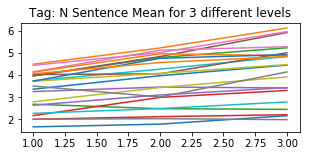

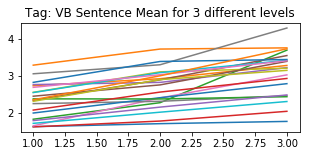

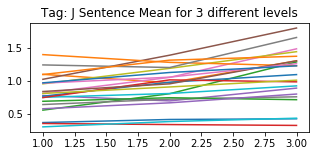

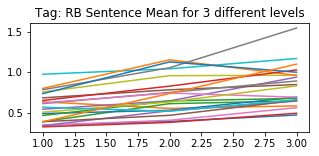

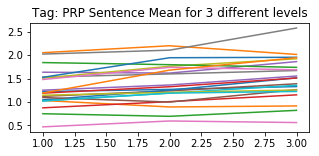

In [237]:

n_cols = 2
n_rows = int(len(filter_tags)/n_cols)+1
for ind,(tag_symb,tag_cols) in enumerate(zip(*[filter_tags,all_filter_tag_col])):
    plt.figure(figsize=(5,2))
    plot_level(df,tag_cols,"Tag: {} Sentence Mean for 3 different levels".format(tag_symb))

In [227]:
n_rows

3

# Save Data to File

In [218]:
prepare_data.save_df(feature_set_path,df)